<a href="https://colab.research.google.com/github/AgusCarchano/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [53]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [54]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.4.1'

In [ ]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [55]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [56]:
#Date no esta en formato de fecha
melb_df["Date"] = pandas.to_datetime(melb_df.Date)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



count    8205.000000
mean     1964.684217
std        37.273762
min      1196.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64

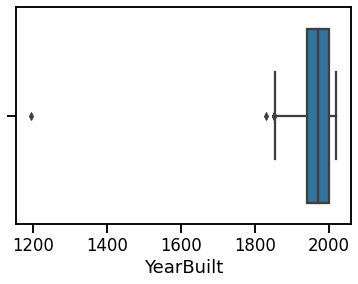

In [57]:
seaborn.boxplot(melb_df.YearBuilt)
melb_df.YearBuilt.describe()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



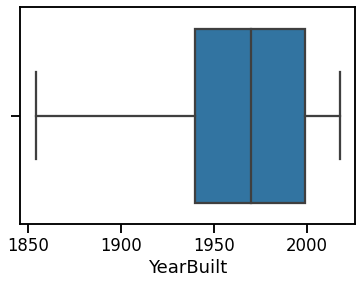

In [72]:
#Se puede limpiar los outliers de la variable YearBuilt, pero hay muchas filas que no tienen valor, se deberia recurrir a la imputacion
melb_edit = melb_df[melb_df['YearBuilt'] > 1850 ]
seaborn.boxplot(melb_edit.YearBuilt)

In [ ]:
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


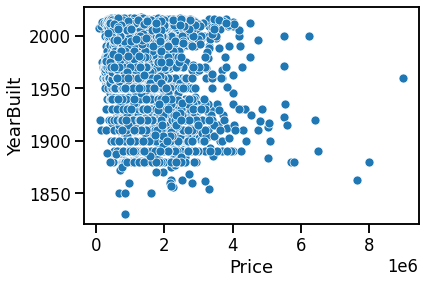

In [ ]:
seaborn.scatterplot(x=melb_edit["Price"], y=melb_edit["YearBuilt"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



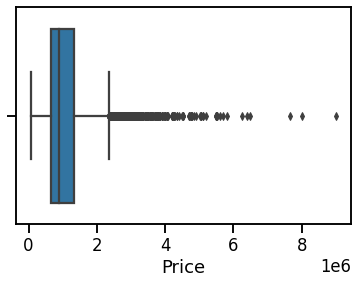

In [ ]:
seaborn.boxplot(melb_df.Price)

In [ ]:
melb_df.Price.describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

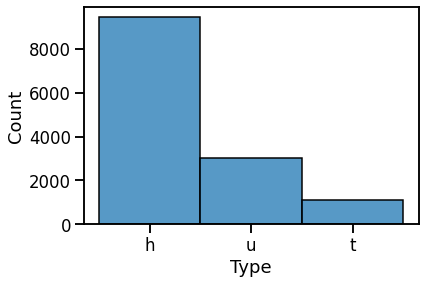

In [31]:
# Veo la distribucion de Type
seaborn.histplot(melb_df.Type)


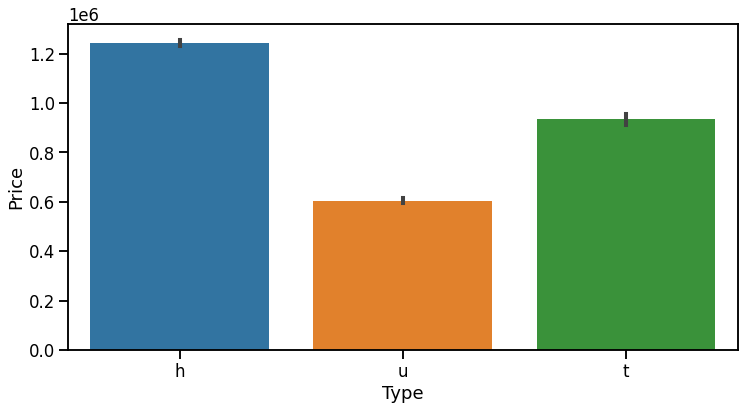

In [28]:
#Relaciono Precios con tipo de vivienda
x = melb_df.Price
y = melb_df.Type

plt.figure(figsize=(12,6))
seaborn.barplot(x=y,y=x,data=melb_df)
plt.show()

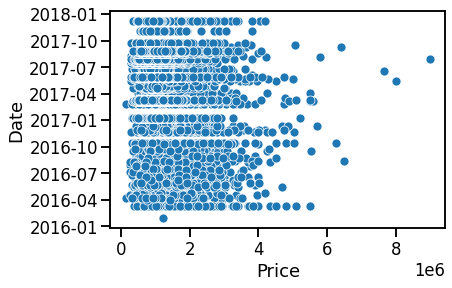

In [18]:
#Analizo la variable Type por tiempo para cada clase
melb_h = melb_df[melb_df.Type == "h"]
seaborn.scatterplot(x=melb_h["Price"], y=melb_h["Date"])

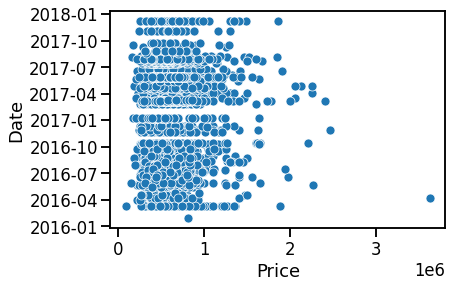

In [14]:
melb_u = melb_df[melb_df.Type == "u"]
seaborn.scatterplot(x=melb_u["Price"], y=melb_u["Date"])

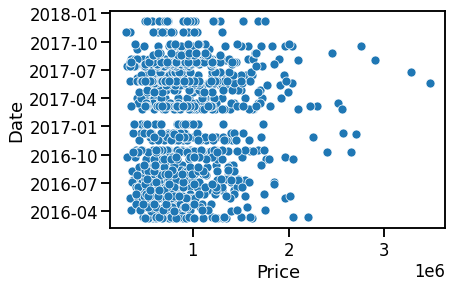

In [15]:
melb_t = melb_df[melb_df.Type == "t"]
seaborn.scatterplot(x=melb_t["Price"], y=melb_t["Date"])

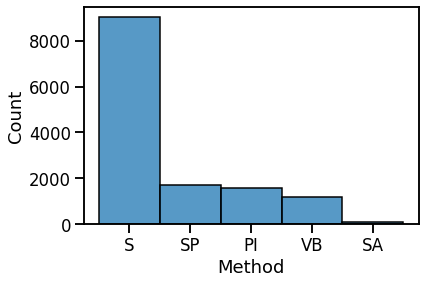

In [7]:
#Analisis de los metodos de venta
seaborn.histplot(melb_df.Method)

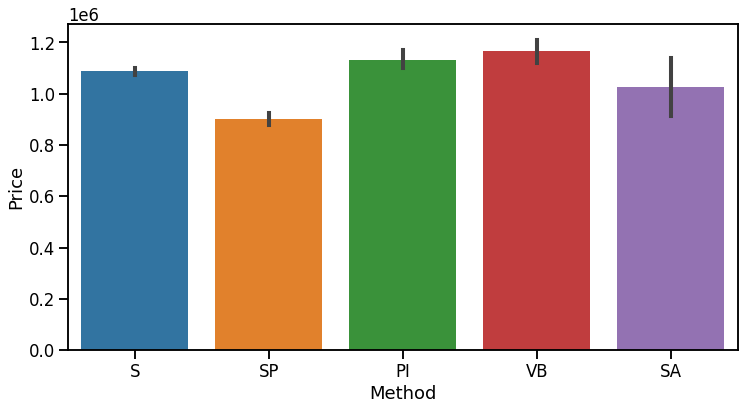

In [29]:
#No se ve gran influencia del metodo en los precios
x = melb_df.Price
y = melb_df.Method

plt.figure(figsize=(12,6))
seaborn.barplot(x=y,y=x,data=melb_df)
plt.show()

In [ ]:
int_cols = melb_df['Price', "Date", "Postcode", "Suburb", ]

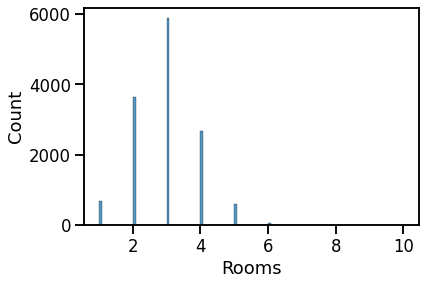

In [33]:
#Analisis de la cantidad de habitaciones
seaborn.histplot(melb_df.Rooms)

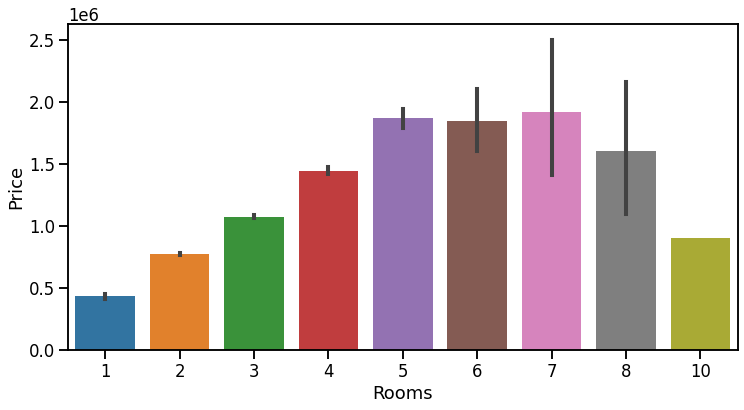

In [34]:
# Comparacion de precios por cantidad de habitaciones
x = melb_df.Price
y = melb_df.Rooms

plt.figure(figsize=(12,6))
seaborn.barplot(x=y,y=x,data=melb_df)
plt.show()

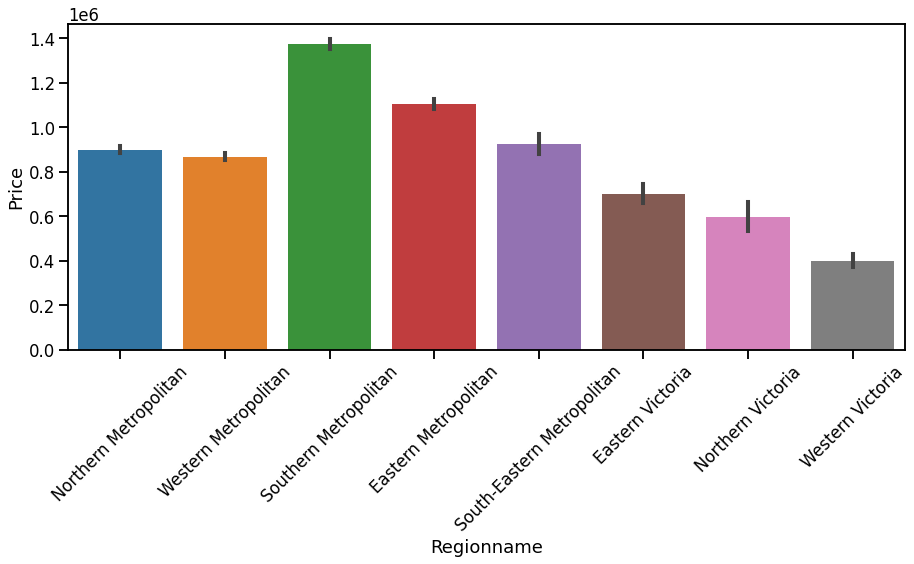

In [76]:
#Precio segun region
x = melb_df.Price
y = melb_df.Regionname

plt.figure(figsize=(15,6))
seaborn.barplot(x=y,y=x,data=melb_df)
plt.xticks(rotation=45)
plt.show()

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.